
\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# 1. {-}

## Data Cleaning and Processing {-}

First we download the stock price data of Kellogg with various frequency. 

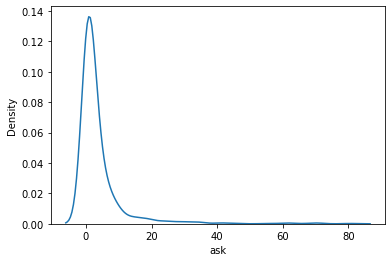

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('optionssample09302017.txt')

sns.kdeplot(df['ask'])
plt.show()

In [29]:
df.sort_values(by='timetoexpiry').tail()

,symbol,timetoexpiry,strike,last,bid,ask,volume,openint,curprice,histvol,implvol,bsval
578,KSU,475,125.0,4.70,5.6,6.20,13,15,108.680000,0.101142,0.240553,0.734413
436,TV,475,30.0,2.60,1.0,1.45,30,260,24.670000,0.125439,0.282314,0.153180
806,DFS,839,32.5,31.78,30.5,33.90,20,20,64.480003,0.179122,0.412508,32.003034
919,ALL,839,95.0,8.55,7.7,9.35,59,60,91.910004,0.223948,0.192198,11.112414
487,NCR,839,47.0,4.20,4.0,4.90,4000,4000,37.520000,0.234740,0.351553,2.367775


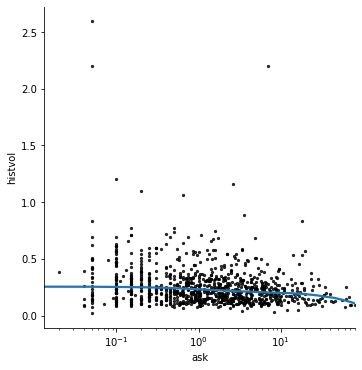

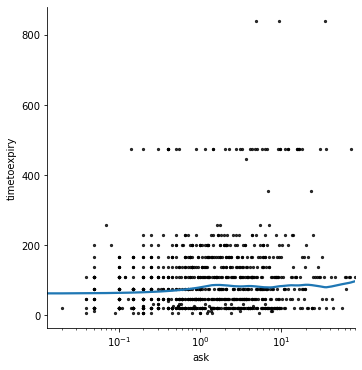

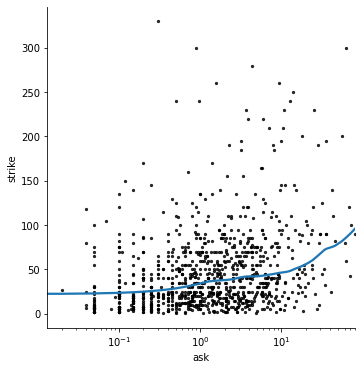

In [24]:
'''
histvol: happens to go down. without other info like K, T, ask can be anywhere

timetoexpiry: kind of makes sense; won't see long expiry with extremely low ask

strike: makes sense; whenever there is volume the current price can't be too far off the strike; so high strike means high current price which means high ask
'''
for response in ['histvol', 'timetoexpiry', 'strike']:
    grid = sns.lmplot(data=df, x='ask', y=response, lowess=True, scatter_kws={'s': 5, 'color': 'black'})
    grid.set(xscale='log')
    
plt.show()

In [ ]:
from get_all_tickers import get_tickers as gt
import numpy as np

np.random.seed(0)

NYSEtickers = gt.get_tickers(NYSE=True,NASDAQ=False,AMEX=False)
tickers = np.random.choice(NYSEtickers, 250, replace=False)

In [8]:
tickers = ['DEN', 'FF', 'GNT', 'NRUC', 'DNP', 'JHI', 'KEN', 'RSF', 'MSI',
       'SAH', 'SOL', 'WFC', 'SIG', 'EXTN', 'BHK', 'CCO', 'RKT', 'WMK',
       'SAVE', 'FMC', 'CNF', 'BRFS', 'IFF', 'LAD', 'FOR', 'ROP', 'SAM',
       'EARN', 'SMP', 'PBC', 'WBS', 'FSLY', 'UIS', 'WTM', 'VRT', 'CX',
       'NXC', 'YPF', 'ASX', 'FCRW', 'CCI', 'KRG', 'TG', 'ECL', 'ATGE',
       'CEM', 'SJW', 'LCI', 'NVO', 'PAC', 'CW', 'EBF', 'LZB', 'VST',
       'STT', 'KTF', 'IRET', 'ADC', 'TREB', 'ARL', 'ARR', 'FCRZ', 'MCK',
       'SBR', 'JE', 'CHT', 'VNCE', 'ABR', 'CTVA', 'MMS', 'RE', 'HEXO',
       'MHF', 'OHI', 'MXF', 'PM', 'GIX~', 'JWN', 'RCA', 'EQS', 'VVV',
       'ROG', 'TREX', 'VEDL', 'NOM', 'CS', 'UNF', 'SCA', 'CIM', 'DHI',
       'TARO', 'CATO', 'NEW', 'DSL', 'GLOP', 'MTOR', 'CUBI', 'BLE', 'ASR',
       'NRK', 'LGC', 'BZM', 'PIPR', 'MUSA', 'MCS', 'DK', 'BPMP', 'NAN',
       'SGU', 'ASH', 'SOI', 'REZI', 'BIP', 'PSB', 'EEX', 'GSL', 'MHLA',
       'KMI', 'WOW', 'HMN', 'ACB', 'GPJA', 'E', 'SXI', 'LNN', 'BFT',
       'PNM', 'DYFN', 'NAV', 'SJI', 'KF', 'EIX', 'FI', 'NGVT', 'NCLH',
       'BH', 'UTI', 'DLX', 'UNMA', 'COO', 'SUM', 'BHC', 'SAP', 'EMN',
       'AAT', 'HRL', 'FMN', 'FUL', 'DTE', 'FMS', 'V', 'CRY', 'FTCH', 'BV',
       'MRC', 'TEL', 'UVV', 'PYN', 'SU', 'SNR', 'AVTR', 'HTD', 'OI',
       'TOL', 'NXP', 'DKS', 'CSLT', 'WRE', 'TRU', 'BDX', 'IPOC', 'KGC',
       'PHG', 'OLN', 'ACN', 'PLOW', 'CMCM', 'UZD', 'DFP', 'SFB', 'GRUB',
       'ADX', 'SRL', 'BMEZ', 'OOMA', 'EURN', 'RPLA', 'GCV', 'WF', 'IX',
       'PAYC', 'DCP', 'SFUN', 'EXPR', 'BOH', 'BY', 'GME', 'PXD', 'PCG',
       'PANW', 'NVGS', 'SKM', 'CIXX', 'CUZ', 'BAM', 'DLY', 'BABA', 'FSLF',
       'SAND          ', 'PPX', 'ABB', 'COR', 'ITCB', 'SWX', 'FRO', 'MUC',
       'PTY', 'MMC', 'HIX', 'CYH', 'KNX', 'ETG', 'LL', 'WAT', 'SBBA',
       'HYB', 'PSTL', 'PMVC', 'RMM', 'APO', 'OKE', 'UBER', 'KAI', 'BBK',
       'WMB', 'CMC', 'MMP', 'FN', 'UTL', 'MQY', 'CVNA', 'JMM', 'NTR',
       'EMP', 'CACI', 'GOF', 'TFC', 'DLNG', 'SBE', 'BEDU']

In [94]:
import yfinance as yf
df = yf.download(tickers, start="2020-01-01", end="2020-03-01")['Close']

[*********************100%***********************]  250 of 250 completed

16 Failed downloads:
- UZD: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SCA: No data found for this date range, symbol may be delisted
- PMVC: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- BFT: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- RKT: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- EMP: No data found for this date range, symbol may be delisted
- CIXX: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SBBA: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- IPOC: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SAND          : No data found, symbol may be delisted
- GIX~: No data found, symbol may be delisted
- DEN: No data found for this date range, symbol may be delisted
- DYFN: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- S

In [96]:
# df.index = [date.to_pydatetime().date() for date in df.index]
df.head()

,AAT,ABB,ABR,ACB,ACN,ADC,ADX,APO,ARL,ARR,...,WAT,WBS,WF,WFC,WMB,WMK,WOW,WRE,WTM,YPF
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,44.980000,24.370001,14.13,24.240000,210.149994,67.660004,15.84,47.660000,16.33,18.040001,...,235.059998,53.360001,30.090000,53.750000,23.49,40.380001,7.19,29.020000,1122.900024,11.26
2020-01-03,45.880001,24.180000,14.19,24.000000,209.800003,69.260002,15.76,47.310001,16.15,18.139999,...,231.009995,53.160000,29.190001,53.419998,23.59,40.439999,7.12,29.440001,1120.689941,11.16
2020-01-06,46.220001,24.309999,14.20,22.799999,208.429993,69.980003,15.73,47.580002,15.97,18.240000,...,228.880005,52.549999,28.750000,53.099998,23.90,40.560001,7.08,29.510000,1120.250000,11.14
2020-01-07,45.340000,24.270000,14.24,21.959999,203.929993,69.989998,15.75,47.630001,16.40,18.350000,...,231.979996,52.160000,28.730000,52.660000,23.90,40.669998,7.00,29.410000,1112.119995,10.91


In [162]:
df.to_csv('alldata.csv')

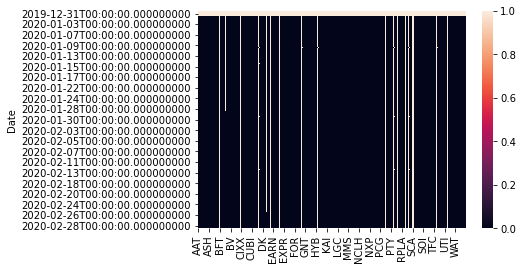

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('alldata.csv', infer_datetime_format=True, parse_dates=[0], index_col=0)

sns.heatmap(data.isna())
plt.show()

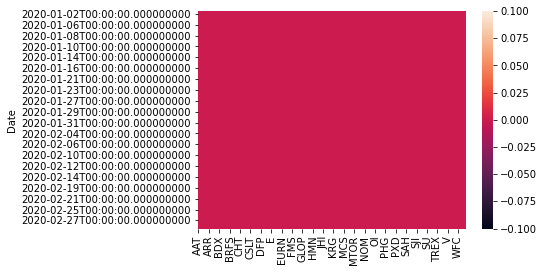

In [2]:
data = data[1:].dropna(axis='columns')

sns.heatmap(data.isna())
plt.show()

In [3]:
data = data.T[:200]

data = data.sub(data.mean(axis='columns'), axis='index').div(data.std(axis='columns'), axis='index')

dataJan = data.T[data.columns.month==1].T
dataFeb = data.T[data.columns.month==2].T

dataJan.shape, dataFeb.shape

((200, 21), (200, 19))

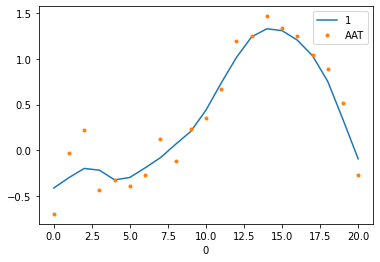

In [4]:
import statsmodels.api as sm
from pandas import DataFrame

ticker = 'AAT'

lowout = sm.nonparametric.lowess(dataJan.loc[ticker], range(21), frac=0.3)
ax = DataFrame(lowout).set_index(0).plot()
DataFrame(dataJan.loc[ticker]).reset_index().drop('Date', axis='columns').plot(style='.', ax=ax)
plt.show()


In [5]:
dataJanR = dataJan.T
dataJanR['dateIdx'] = range(21)

dataFebR = dataFeb.T
dataFebR['dateIdx'] = range(19)

In [6]:
import rpy2
%load_ext rpy2.ipython

In [7]:
%%R -i dataJanR -o optspanJan

library(fANCOVA)

optspanJan <- list()

for (ticker in colnames(dataJanR))
{
    holdlo = loess.as(dataJanR$dateIdx, dataJanR[[ticker]], criterion='aicc')
    optspanJan[[ticker]] <- holdlo$pars$span
}

R[write to console]: fANCOVA 0.5-1 loaded



In [8]:
%%R -i dataFebR -o optspanFeb

library(fANCOVA)

optspanFeb <- list()

for (ticker in colnames(dataFebR))
{
    holdlo = loess.as(dataFebR$dateIdx, dataFebR[[ticker]], criterion='aicc')
    optspanFeb[[ticker]] <- holdlo$pars$span
}

In [9]:
spanJan = {k: v[0] for k, v in optspanJan.items()}
spanFeb = {k: v[0] for k, v in optspanFeb.items()}

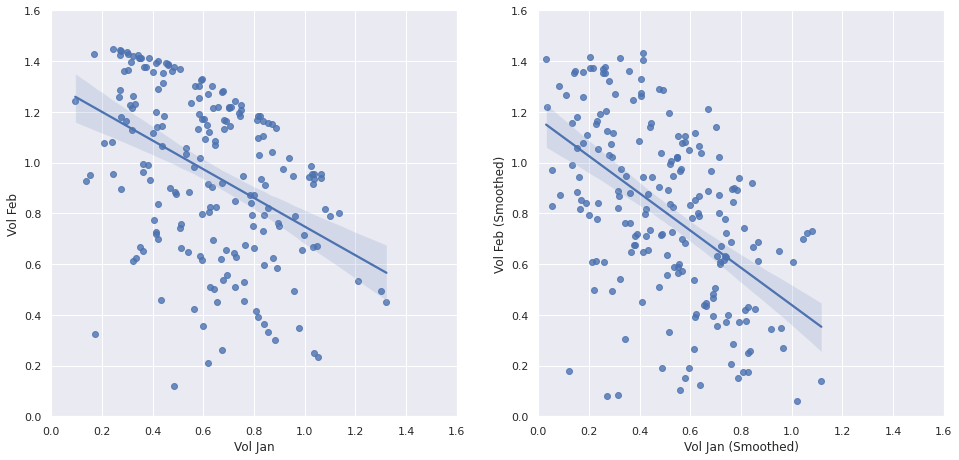

In [18]:
dataJanSmooth = dataJan.copy()
dataFebSmooth = dataFeb.copy()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for ticker in dataJan.index:
    lowout = sm.nonparametric.lowess(dataJan.loc[ticker], range(21), frac=spanJan[ticker])
    dataJanSmooth.loc[ticker] = lowout[:, 1]

    lowout = sm.nonparametric.lowess(dataFeb.loc[ticker], range(19), frac=spanFeb[ticker])
    dataFebSmooth.loc[ticker] = lowout[:, 1]

data['Vol Jan'] = dataJan.std(axis='columns')
data['Vol Feb'] = dataFeb.std(axis='columns')
data['Vol Jan (Smoothed)'] = dataJanSmooth.std(axis='columns')
data['Vol Feb (Smoothed)'] = dataFebSmooth.std(axis='columns')

sns.set(rc={'figure.figsize':(8, 8)})
sns.regplot(x='Vol Jan', y='Vol Feb', data=data, ax=axs[0])
sns.regplot(x='Vol Jan (Smoothed)', y='Vol Feb (Smoothed)', data=data, ax=axs[1])
axs[0].set(xlim=(0, 1.6), ylim=(0, 1.6), aspect=1)
axs[1].set(xlim=(0, 1.6), ylim=(0, 1.6), aspect=1)
plt.show()

In [19]:
data[[col for col in data.columns if isinstance(col, str)]]

Date,Vol Jan,Vol Feb,Vol Jan (Smoothed),Vol Feb (Smoothed)
AAT,0.683041,1.134641,0.565773,1.078804
ABB,0.460324,1.386214,0.406711,1.264570
ABR,0.460533,1.388184,0.414536,1.403375
ACB,0.587835,1.019685,0.328004,0.974772
ACN,0.273805,1.441289,0.031862,1.408390
...,...,...,...,...
SOL,0.329472,1.230159,0.162294,0.942145
SRL,0.422956,0.699670,0.414327,0.649113
STT,0.647008,1.086339,0.524913,1.004934
SU,0.564579,0.424458,0.514396,0.331139
